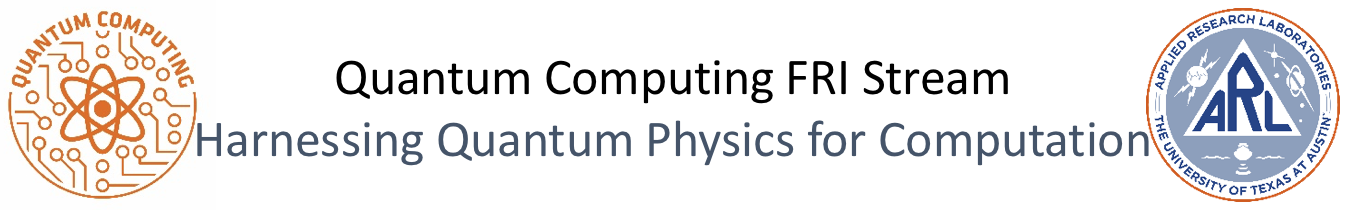

# Introduction to Quantum Error Correction
## Lesson 16

### Installations and Imports

In [1]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

In [3]:
def rand(a=0, b=1):
    return a + (b-a)*np.random.random()

## Today's Objectives

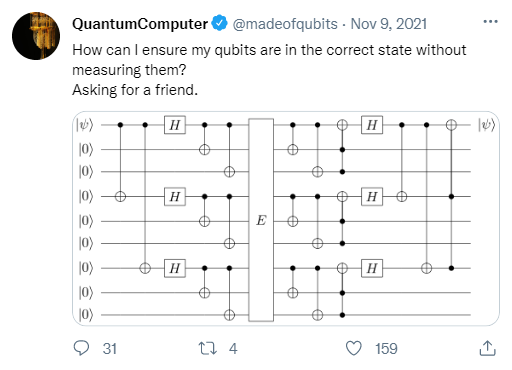

- Implement a quantum error correction protocol that protects against single-qubit errors.

## Classical Errors

(hardware)
- Increasingly important as we go to smaller chip scales
- Decay of alpha particles within the device is the main source of these “soft errors.”

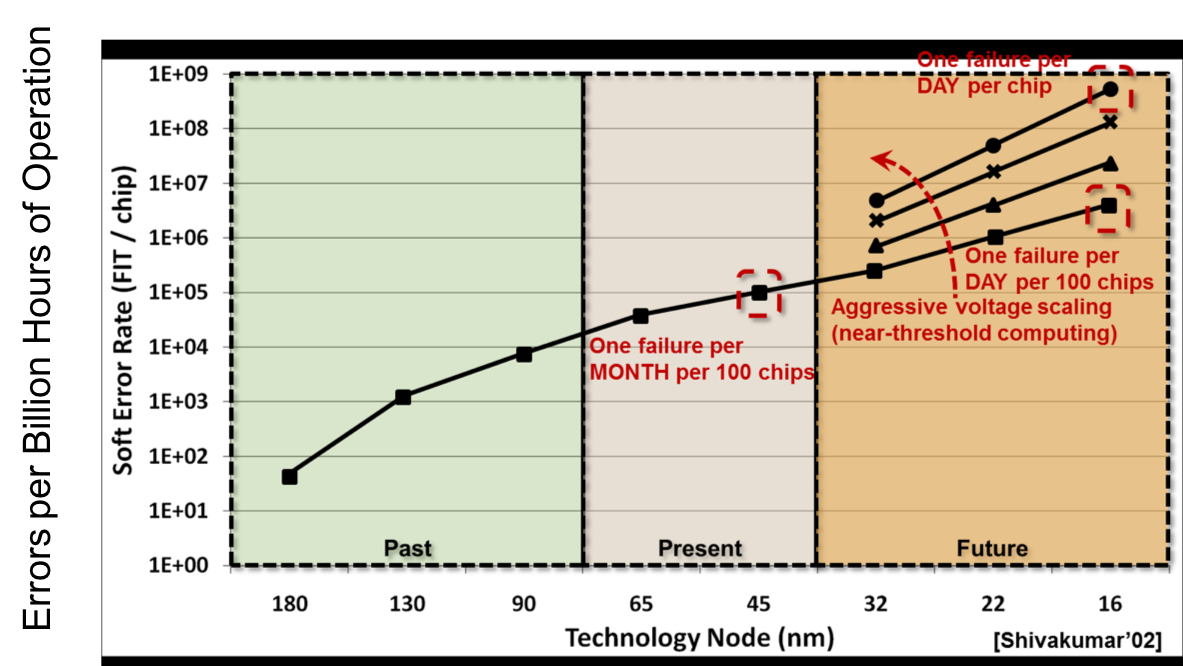

## Classical Error Correction

No one bothers to correct soft errors in computers – just reboot!

It is, however, very important in digital communication.

#### How do you correct errors you don’t know about?

- Add redundancy.
- Diagnose the error.
- Correct it.

### Example: Repetition Codes


To communicate the bits 0 and 1, transmit 000 and 111.

#### Can you spot & correct the 3 errors in the sequence below?

111 000 101 111 111 110 000 000 111 000

Corrected: If we are assuming that we use three bits to now communicate one, there are two erroneous sets: 101 and 110. However, since we know there are three errors, we know that the corrected sets should be either 000 and 111 or 111 and 000. So we can't fix this without adding redundancy.

## Quantum Errors

#### Are a big problem.

- Typical quantum devices are atomic-scale and sensitive the environment.
- We can’t just isolate them  ̶  we need to interact with them to compute!


#### Are difficult to detect.

- Measuring a quantum state causes it to collapse (or partially collapse).
- Even weakly interacting it can alter its state.

#### Are not just bit flips.

- Quantum states live in a Hilbert space, and the errors can be continuous.
- Errors can even take a quantum state out of the Hilbert space altogether.
- Interestingly, they can often be described by a few random, discrete gates.

## Quantum Error Correction

Start with emulating classical, which means bit flips!

### <font color=green>Exercise</font>

**Three-Qubit Repetition Code**

Take an arbitrary single qubit state and encode it in a 3-qubit repetition code. Use a statevector simulation or measurement to show that the state has indeed been encoded into 3 qubits.

{You can visualize the statvector simulation with
plot_state_city( ) or plot_bloch_multivector( ) }

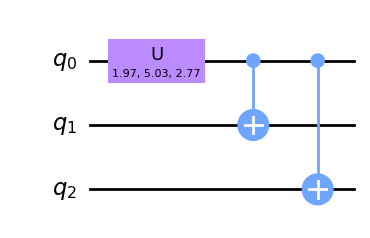

In [33]:
n=3
qc=QuantumCircuit(n)

#Create an arbitrary state on q[0]
theta = np.arccos(rand(-1,1))
phi = 2*np.pi*rand()
lamb = np.pi*rand()

qc.u(theta, phi, lamb, 0)
qc.cx(0,1)
qc.cx(0,2)
#Your Code Here

qc.draw('mpl')

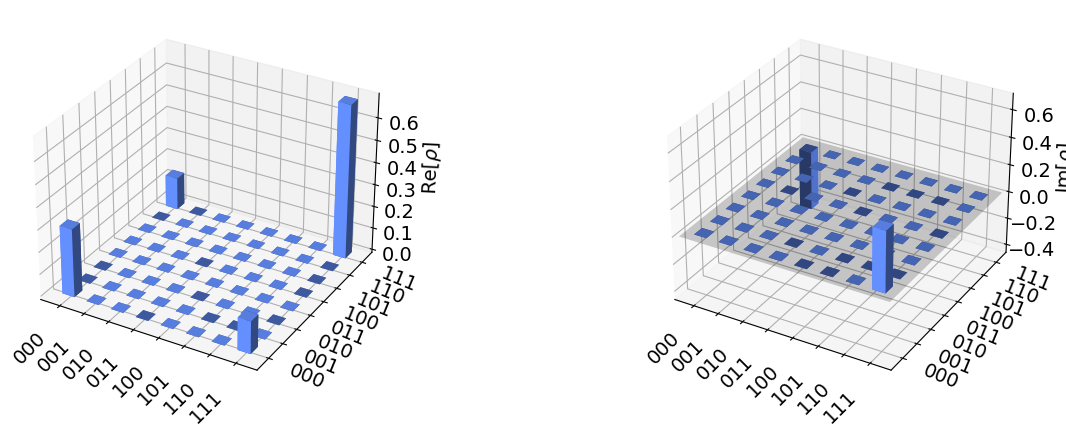

In [34]:
plot_state_city(qc)

### Bit-Flip Errors

Assuming only a single bit-flip error has occurred after encoding, there are three possibilities:

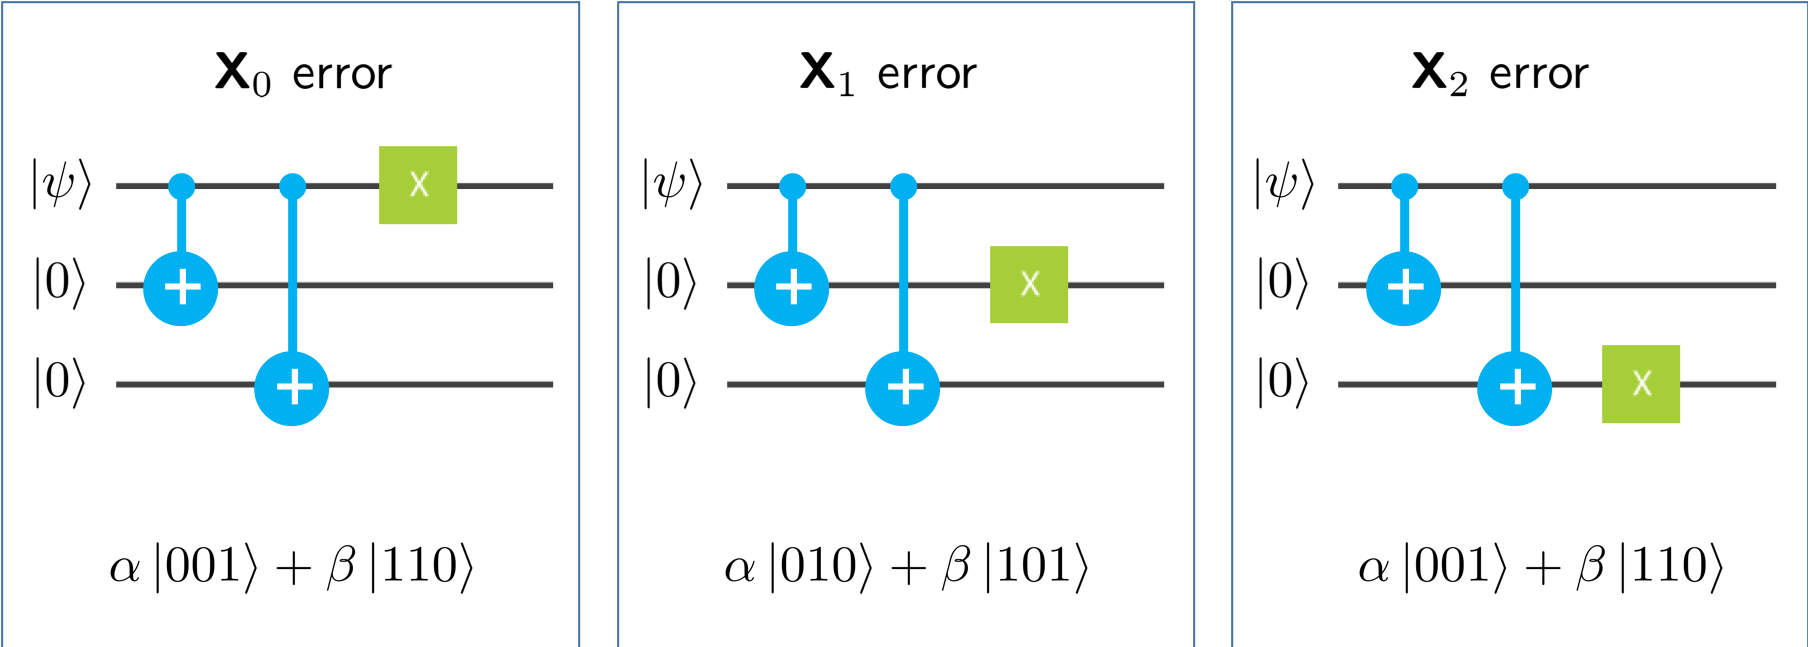

How can we detect and fix them?

### Bit-Flip Syndrome Measurement

We can add two auxiliary qubits with which we entangle our encoded circuit.

Then we can measure the auxiliary qubits without disrupting the encoded state as shown below.

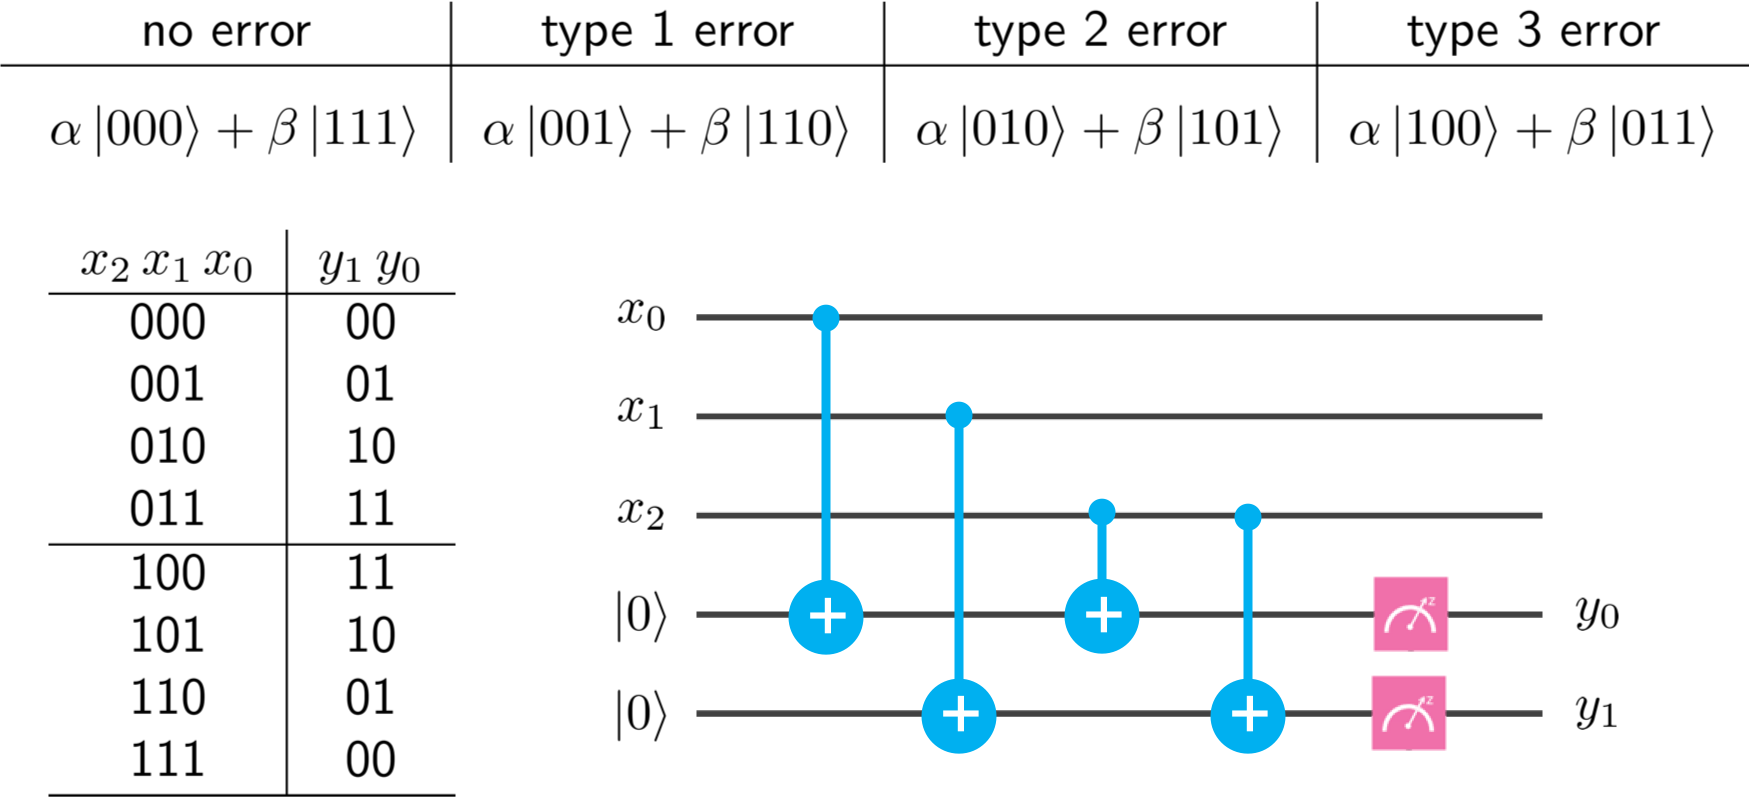

### Beyond Bit Flips

**Three-Qubit Phase Repetition Code**

Using Hadamard gates, we can change the basis of the "bit flip" error to see it as a phase-flip.

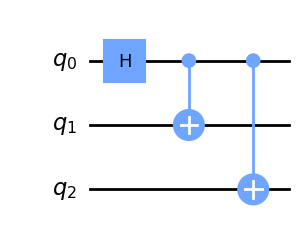

In [7]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

qc.draw('mpl')

This repetition code protects against an single-qubit **Z** error rather than an **X** error.

#### <font color=green>Exercise!</font>

The Shor 9-qubit code nests a phase-flip repetition code within a bit-flip repetition code.

A self-correcting version of the 9-qubit code is depicted in the "Today's Objectives" section of this notebook.

Take an arbitrary single qubit state and encode it in a 9-qubit, nested repetition code to protect against an arbitrary single-qubit error. Use a statevector simulation or measurement to show that the state has indeed been protected.

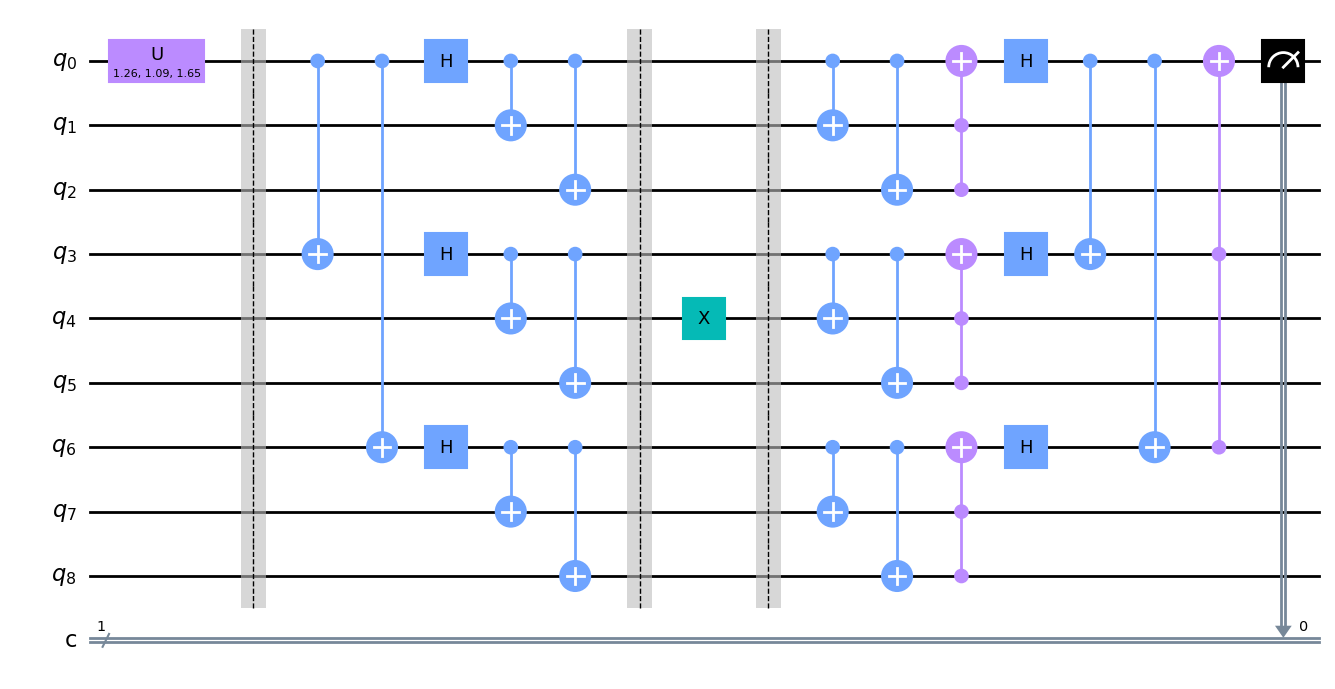

In [25]:
qc=QuantumCircuit(9,1)

#Create an arbitrary state on q[0]
theta = np.arccos(rand(-1,1))
phi = 2*np.pi*rand()
lamb = np.pi*rand()

qc.u(theta, phi, lamb, 0)

qc.barrier()

qc.cx(0,3)
qc.cx(0,6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)
qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

qc.barrier()

qc.x(4)

qc.barrier()

qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)
qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)
qc.mcx([1,2],0)
qc.mcx([4,5],3)
qc.mcx([7,8],6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0,3)
qc.cx(0,6)
qc.mcx([3,6],0)

qc.measure(0, 0)
#Your Code Here

qc.draw('mpl')

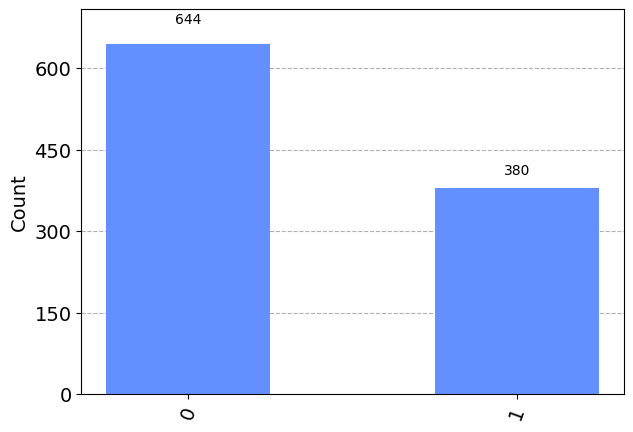

In [26]:
qctest = QuantumCircuit(1,1)
qctest.u(theta, phi, lamb, 0)
qctest.measure(0,0)
backend = Aer.get_backend('qasm_simulator')
countsT=execute(qctest, backend, shots=1024).result().get_counts(qctest)
plot_histogram(countsT)

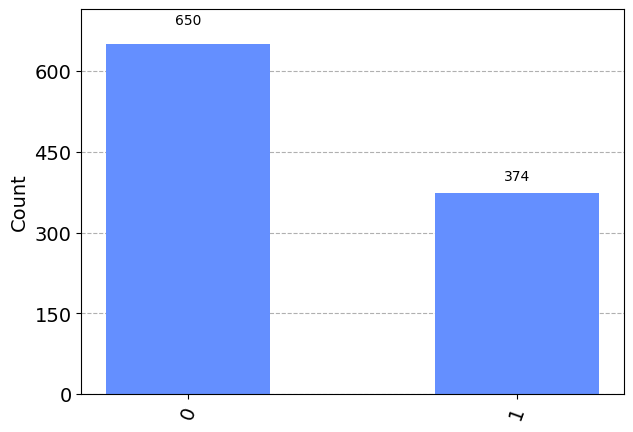

In [30]:
backend = Aer.get_backend('qasm_simulator')
counts=execute(qc, backend, shots=1024).result().get_counts(qc)
plot_histogram(counts)

Added in a bit flip and the state was protected